In [1]:
%matplotlib notebook
import numpy as np
import scipy
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print(matplotlib.__version__)

2.2.2


### Scatter some points in $\mathbb{R}^3$

For simplicity, we will scatter $n$ points, centered around the origin, with a uniform distribution.
These are the targets we want to accurately view.

In [2]:
def scatter_r3(n,lb,ub,plot=True):

    A = np.random.uniform(lb,ub,(3,n))

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        ax.scatter(A[0,:],A[1,:],A[2,:],c = 'r')
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    return A

<IPython.core.display.Javascript object>


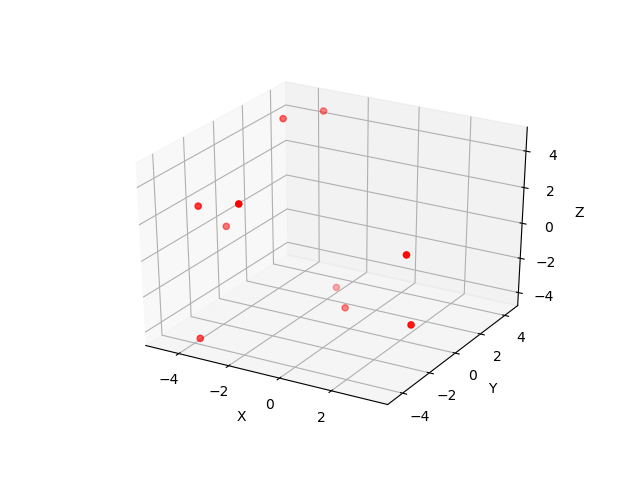

array([[-4.51026589, -4.74230596,  3.5274275 , -2.31008401,  2.81118874,
        -4.04327539, -0.52439668, -3.44608393, -1.75494274, -3.49822792],
       [-2.58545954, -0.36518102, -2.26501543, -3.58051941, -1.28633091,
         2.5804124 ,  0.62588071,  4.44130559,  2.26427182, -4.44200975],
       [ 2.07068015, -0.19723025, -2.11451753,  3.30996731,  0.9970359 ,
         4.65062803, -4.05575728,  4.43351019, -4.12687837, -4.07376963]])

In [9]:
scatter_r3(10, -5, 5)

## Operations that will be used in camera class
### Functions include:
* Project to 2D
* Access to camera parameters

<IPython.core.display.Javascript object>


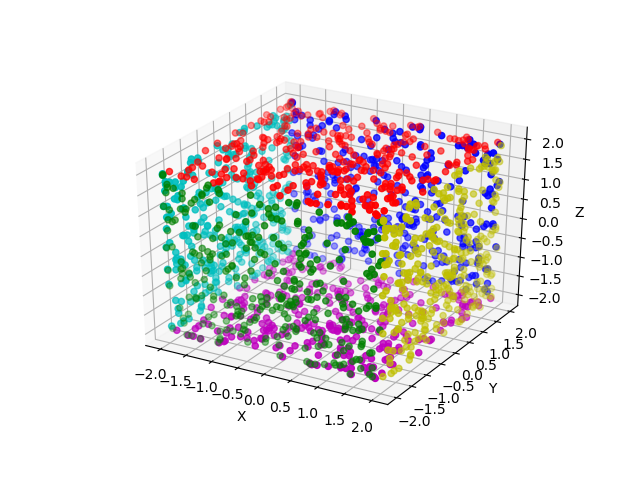

In [23]:
# Scatter an actually meaningful cube
n = 300
random_face = np.random.uniform(-2,2,(2,n))
s1 = np.r_[-2*np.ones((1,n)),random_face]
s2 = np.r_[2*np.ones((1,n)),random_face]
s3 = np.r_[random_face,-2*np.ones((1,n))]
s4 = np.r_[random_face,2*np.ones((1,n))]
s5 = np.r_[random_face[0,:],-2*np.ones(n),random_face[1,:]].reshape((3,n))
s6 = np.r_[random_face[0,:],2*np.ones(n),random_face[1,:]].reshape((3,n))
X = np.c_[s1,s2,s3,s4,s5,s6]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(s1[0,:],s1[1,:],s1[2,:],c='c')
ax.scatter(s2[0,:],s2[1,:],s2[2,:],c='y')
ax.scatter(s3[0,:],s3[1,:],s3[2,:],c='m')
ax.scatter(s4[0,:],s4[1,:],s4[2,:],c='r')
ax.scatter(s5[0,:],s5[1,:],s5[2,:],c='g')
ax.scatter(s6[0,:],s6[1,:],s6[2,:],c='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [16]:
def compute_view_matrix(position, target, up):
    '''
    Inputs: 
        position : 3D coordinates of the camera center in world coordinates
        target : 3D coordinates of the camera target in world coordinates
        up : vector specifying the up direction of the camera. should be orthogonal to (target-position)
    Outputs:
        P : 3 x 4 camera extrinsic matrix, a concatenation of rotation matrix and translation matrix
    '''
    L = target - position
    L = L / np.linalg.norm(L)
    s = np.cross(L, up)
    s = s / np.linalg.norm(s)
    u_prime = np.cross(s,L)
    R = np.r_[s,u_prime,-L].reshape((3,3))
    T = -R @ position
    P = np.c_[R,T]
    return P

In [24]:
def project(position,target,up,X):
    '''
    Given camera extrinsic details, and 3D points X, 
    return the homogenous coordinates of Y,
    which are projected into the camera plane.
    See compute_view_matrix() details
    '''
    P = compute_view_matrix(position,target,up)
    _,n = X.shape
    Y = P @ np.r_[X,np.ones((1,n))]
    Y /= Y[2,:]
    return Y

In [25]:
def scatter_projection(ax,n,X):
    # n : number of points per face
    # X : represents the cube
    s1 = X[:,:n]
    s2 = X[:,n:2*n]
    s3 = X[:,2*n:3*n]
    s4 = X[:,3*n:4*n]
    s5 = X[:,4*n:5*n]
    s6 = X[:,5*n:6*n]
    
    ax.scatter(s1[0,:],s1[1,:],c='c')
    ax.scatter(s2[0,:],s2[1,:],c='y')
    ax.scatter(s3[0,:],s3[1,:],c='m')
    ax.scatter(s4[0,:],s4[1,:],c='r')
    ax.scatter(s5[0,:],s5[1,:],c='g')
    ax.scatter(s6[0,:],s6[1,:],c='b')

#     ax.set_xlabel('X')
#     ax.set_ylabel('Y')
#     ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


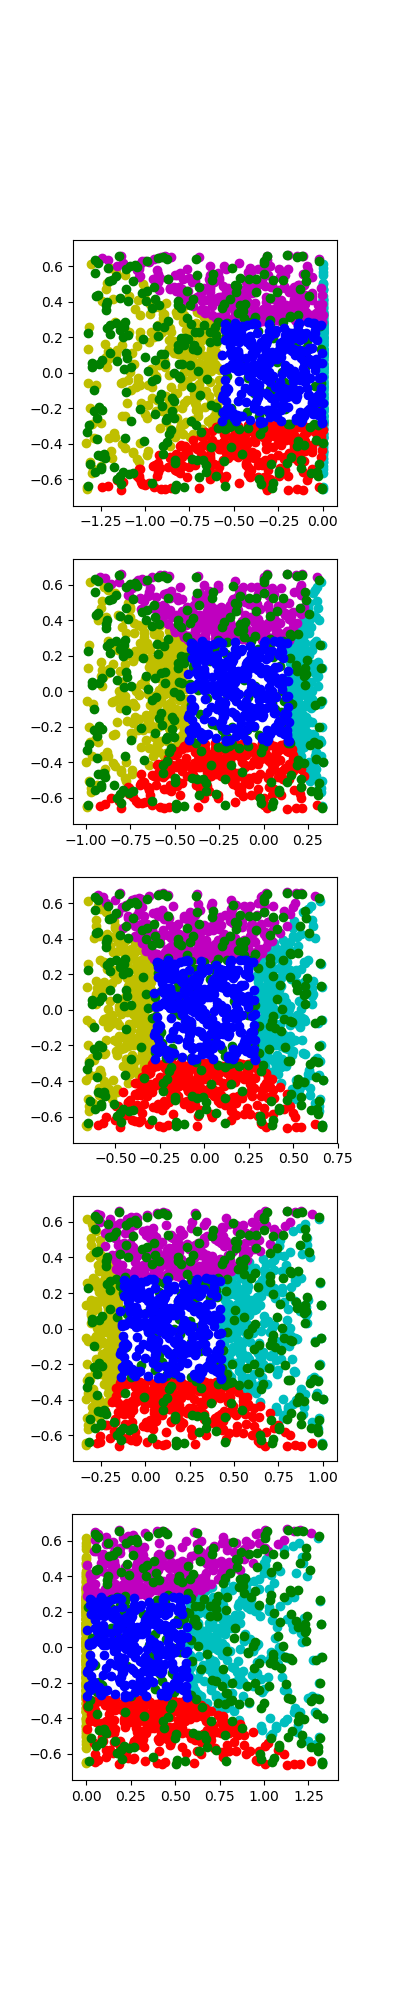

In [28]:
# Play with different cameras along a translational track only

Y1 = project(np.array([-2,-5,0]),np.array([-2,0,0]),np.array([0,0,1]),X)
Y2 = project(np.array([-1,-5,0]),np.array([-1,0,0]),np.array([0,0,1]),X)
Y3 = project(np.array([0,-5,0]),np.array([0,0,0]),np.array([0,0,1]),X)
Y4 = project(np.array([1,-5,0]),np.array([1,0,0]),np.array([0,0,1]),X)
Y5 = project(np.array([2,-5,0]),np.array([2,0,0]),np.array([0,0,1]),X)
fig = plt.figure(figsize=(4,20))
ax = fig.add_subplot(511,aspect='equal')
scatter_projection(ax,n,Y1)
ax = fig.add_subplot(512,aspect='equal')
scatter_projection(ax,n,Y2)
ax = fig.add_subplot(513,aspect='equal')
scatter_projection(ax,n,Y3)
ax = fig.add_subplot(514,aspect='equal')
scatter_projection(ax,n,Y4)
ax = fig.add_subplot(515,aspect='equal')
scatter_projection(ax,n,Y5)

<IPython.core.display.Javascript object>


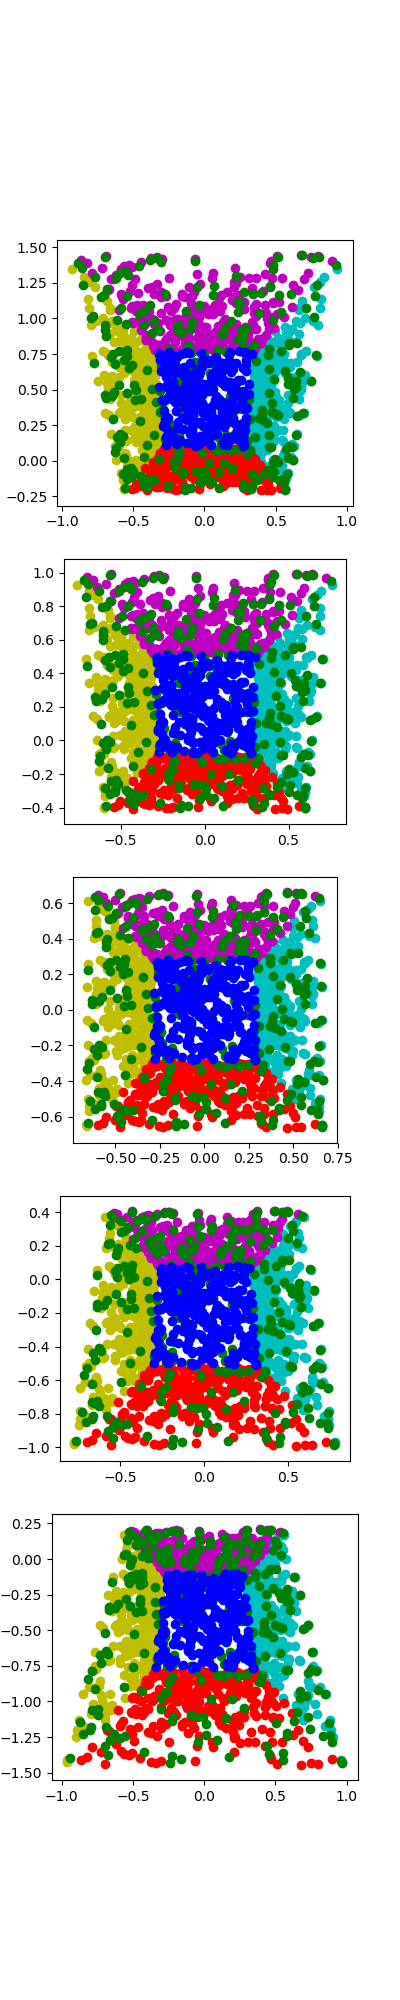

In [29]:
# Play with different cameras at the same point but looking up/down

Y1 = project(np.array([0,-5,0]),np.array([0,0,2]),np.array([0,-2,5]),X)
Y2 = project(np.array([0,-5,0]),np.array([0,0,1]),np.array([0,-1,5]),X)
Y3 = project(np.array([0,-5,0]),np.array([0,0,0]),np.array([0,0,1]),X)
Y4 = project(np.array([0,-5,0]),np.array([0,0,-1]),np.array([0,1,5]),X)
Y5 = project(np.array([0,-5,0]),np.array([0,0,-2]),np.array([0,2,5]),X)
fig = plt.figure(figsize=(4,20))
ax = fig.add_subplot(511,aspect='equal')
scatter_projection(ax,n,Y1)
ax = fig.add_subplot(512,aspect='equal')
scatter_projection(ax,n,Y2)
ax = fig.add_subplot(513,aspect='equal')
scatter_projection(ax,n,Y3)
ax = fig.add_subplot(514,aspect='equal')
scatter_projection(ax,n,Y4)
ax = fig.add_subplot(515,aspect='equal')
scatter_projection(ax,n,Y5)